# Retificador de onda completa (Carga R/L/E)

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 169.7056274847714 
Vm: 	 119.51427089416356 
Vrms: 	 124.91004004220879
# - Corrente na carga - # 
Ipk: 	 24.215621627567366 
Im: 	 19.307291282146956 
Irms: 	 25.915425038636133
# - Potências - # 
Ppk:	 7282.859976912635 
P: 	 479.50047563325336 
S: 	 1858.0644296039425
# - Fatores - # 
FP:	 0.2580645041116587 
THD V:	 0.0018850159739448942 
THD I:	 0.35322855234521006


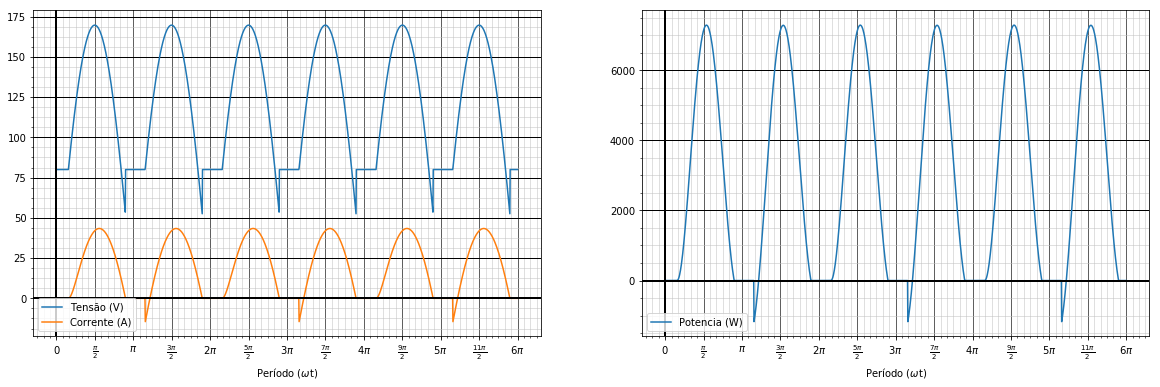

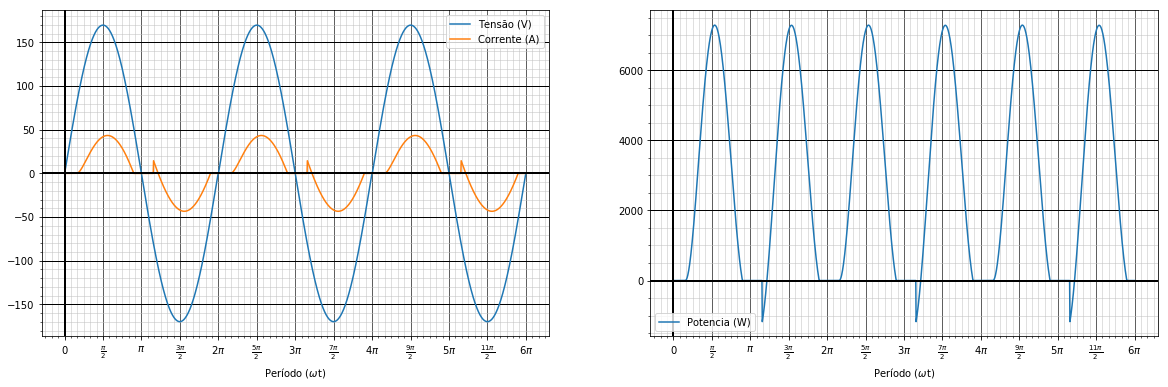

In [8]:
############# RETIFICADOR ONDA COMPLETA ############
################### CARGA R/L/E ####################
V_pk = 120*sqrt(2)
Freq = 60
R = 2
L = 0.001
E = 80
T = 2*pi
a = 0
b = pi

w = 2*pi*Freq

XL = w * L

XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL)
tal = L/R

func_vout = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - 2*heaviside(x - {b}, 0) + {eps} )'

Iout_media = (calculo_medio(func_vout)-E)/R
Pdc = Iout_media*E

# Calculo das harmonicas e termos da série de Fourier para cálculo da Irms
numero_harmonicas = 4
Vh = calculo_harmonicas(func_vout, T, numero_harmonicas)
Zh = [abs(complex(R,n*XL)) for n in range(0,numero_harmonicas+1)]
Iout_rms = Iout_media**2
for n in range(2, numero_harmonicas+1, 2):
    Iout_rms = Iout_rms + ((Vh[n]/Zh[n])**2)/2
Iout_rms = sqrt(Iout_rms)

# Variação na corrente de saída baseada na segunda harmônica
delta_i = 2*Vh[2]/Zh[2]

# Verifica qual é mais provável entre modo de operação continuo ou descontinuo de condução
if delta_i <= 2*Iout_media:
    #############################
    # MODO CONTÍNUO DE CONDUÇÃO #
    #############################
    
    # Função da corrente de saída considerando apenas até a quarta harmônica
    func_iout = f'({Iout_media} + {(Vh[2]/Zh[2])}*sin(2*x+{pi}) + {(Vh[4]/Zh[4])}*cos(4*x+{pi}) + {eps}*x)'    
    I_pk = calculo_pk(func_iout) #Iout_media + delta_i/2
    
    P = (Iout_rms**2)*R
    S = Iout_rms*(V_pk/sqrt(2)) # Considerando que a corrente eficaz na fonte é igual à na carga

    print("# - Parâmetro extra - #","\ndelta I (2ª harmônica)", delta_i)
else:
    ################################
    # MODO DESCONTÍNUO DE CONDUÇÃO #
    ################################
    
    ab = calculo_ab(f'{V_pk}*sin(x) - {E}', 0, 'scipy')
    a = ab[0]
    
    A = ((-V_pk/Z)*sin(a - teta) + (E/R))*exp(a/(w*tal))
    
    ab = calculo_ab(f'(({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))', pi, 'scipy')
    b = ab[0]

    func_vout = f'{E} + ({V_pk}*sin(x) - {E})*(heaviside(x-{a},0)-heaviside(x-{b},0)+{eps}) +  (-{V_pk}*sin(x) - {E})*(heaviside(x-{a+pi},0)-heaviside(x-{b+pi},0)+{eps})'
    
    func_iout = f'(({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))*(heaviside(x-{a},0)-heaviside(x-{b},0)+{eps}) + (-({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))*(heaviside(x-{a+pi},0)-heaviside(x-{b+pi},0)+{eps})'

    Iout_media = calculo_medio(func_iout)
    Iout_rms = calculo_rms(func_iout)
    
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

func_vin = f'{V_pk}*sin(x)'
func_iin = func_iout + f'*( heaviside(x - {a}, 0) - 2*heaviside(x - {b}, 0) + {eps} )'
func_p = '(' + func_vin + ')*(' + func_iin + ')'
P_pk = calculo_pk(func_p)


FP = P/S

thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_vout, func_iout, xlim=(0, T))
plot_info(func_vin, func_iin, xlim=(0, T))